In [2]:
# train Skeleton code
batch_size = None
lr = None
MaxEpochs = None

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))
w0 = np.array([4.0, -1.0])

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs + 1):
  for x_batch, y_batch in generate_batches(5, x_train, y_train):
    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산
    search_direction = None # 탐색방향 설정
    lr = None # 학습률 설정
    dw = lr * search_direction # 파라미터 업데이트
    w0 = w0 + dw

NameError: ignored

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loss 뽑아주는 함수
def loss(w, x_set, y_set): #w = (weight, bias)
  N = len(x_set)
  val = 0.0
  for i in range(N):
    val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i]) ** 2
  
  return val / N

# 기울기 뽑아주는 함수
def loss_grad(w, x_set, y_set):
  N = len(x_set)
  val = np.zeros_like(w)
  for i in range(N):
    er = w[0] * x_set[i] + w[1] - y_set[i] # 오차율
    val += er * np.array([x_set[i], 1.0])
  
  return val / N

# Batch 뽑아주는 함수
def generate_batches(batch_size, features, labels):
  output_batches = []
  sample_size = len(features)
  for start_i in range(0, sample_size, batch_size):
    end_i = start_i + batch_size
    batch = [features[start_i:end_i], labels[start_i:end_i]]
    output_batches.append(batch)

  return output_batches

# 탐색 방향을 기준으로한 최적화 알고리즘

0 [2.93648078 0.44930529] 1.317380340615943
1 [2.20579892 0.95545057] 0.5305508937938231
2 [1.69978865 1.13366948] 0.24724396406694088
3 [1.34795928 1.19743038] 0.12188425893679689
4 [1.10284036 1.22093425] 0.0624414292092975
5 [0.93189546 1.23006624] 0.03367237311774019
6 [0.81261987 1.23392118] 0.01965687278825914
7 [0.72937561 1.23573946] 0.012808896966180261
8 [0.67127103 1.23670648] 0.0094556008730673
9 [0.63071152 1.23727684] 0.0078095199718650485
10 [0.60239835 1.23763874] 0.006998870792753924


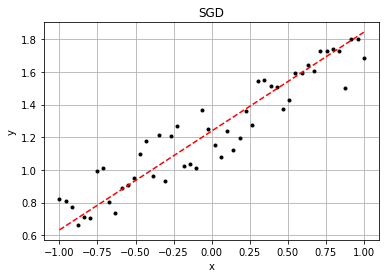

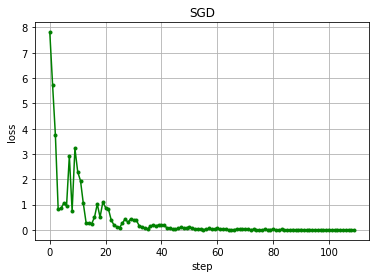

In [5]:
# SGD
batch_size = 5
lr = 0.1
MaxEpochs = 10

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])
search_direction = np.zeros_like(w0)

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs + 1):
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    paths.append(w0)
    batch_loss.append(loss(w0, x_batch, y_batch))

    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산
    search_direction = -grad # 탐색방향 설정
    lr = lr # 학습률 설정
    dw = lr * search_direction # 파라미터 업데이트
    w0 = w0 + dw

  print(epoch, w0, loss(w0, x_train, y_train))

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('y')
plt.title('SGD')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('SGD')
plt.show()

0 [2.55838263 1.04556571] 0.7402674283540965
1 [0.76994487 1.90523578] 0.2890851494144794
2 [0.0063708  1.09477459] 0.05310594328121919
3 [0.05532307 0.93890575] 0.06856973502991709
4 [0.35318822 1.24451434] 0.013343605851208107
5 [0.55982551 1.24398424] 0.009344534881603767
6 [0.60457679 1.13315023] 0.008208708595551263
7 [0.56156692 1.1500043 ] 0.006691273711254676
8 [0.51555839 1.1869605 ] 0.006264246369861995
9 [0.49844626 1.17623101] 0.00615123033754446
10 [0.50180815 1.16539132] 0.006112074637090868


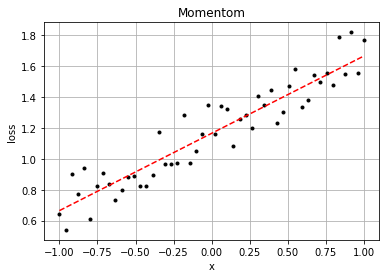

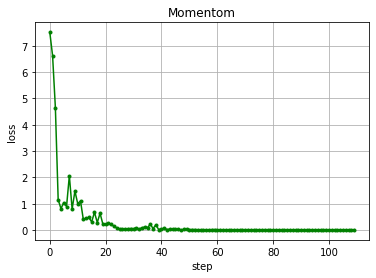

In [6]:
# Momentom
batch_size = 5
lr = 0.03
MaxEpochs = 10

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])
alpha = 0.9 # 한참전 단계의 탐색 방향의 영향을 작게해주는 상수
velocity = np.zeros_like(w0)

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs + 1):
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    paths.append(w0)
    batch_loss.append(loss(w0, x_batch, y_batch))

    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산
    lr = lr # 학습률 설정
    velocity = alpha * velocity - lr * grad # 탐색방향 설정
    dw = velocity # 파라미터 업데이트
    w0 = w0 + dw

  print(epoch, w0, loss(w0, x_train, y_train))

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('loss')
plt.title('Momentom')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Momentom')
plt.show()

0 [2.58036193 0.91004278] 0.781794431181796
1 [0.88369757 1.72164466] 0.18310536545197056
2 [0.14057396 1.18408968] 0.030109111183242557
3 [0.13113771 1.03779072] 0.03975286847762678
4 [0.35682543 1.18786149] 0.010441196433955297
5 [0.52371715 1.20626362] 0.006830301944409994
6 [0.57060128 1.16317023] 0.006705495180470574
7 [0.55020456 1.16211994] 0.006367151099069195
8 [0.52122904 1.17385013] 0.006120584260364253
9 [0.50743431 1.17353149] 0.006106456357312076
10 [0.50671774 1.17074995] 0.006097339567172294


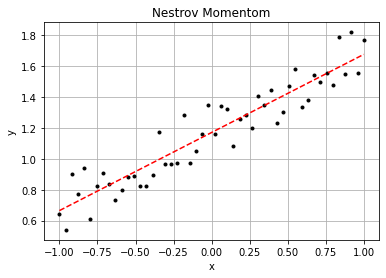

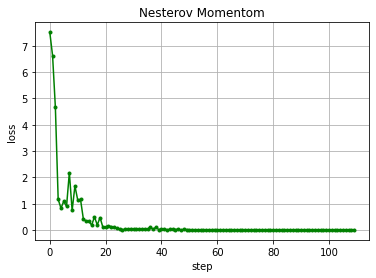

In [7]:
# 기울기 뽑아주는 함수
def N_loss_grad(w, v, a, x_set, y_set):
  N = len(x_set)
  val = np.zeros_like(w)
  for i in range(N):
    er = (w[0] + a * v[0]) * x_set[i] + (w[1] + a * v[1]) - y_set[i] # 오차율
    val += er * np.array([x_set[i], 1.0])
  
  return val / N

# Nesterov
batch_size = 5
lr = 0.03
MaxEpochs = 10

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])
alpha = 0.9 # 한참전 단계의 탐색 방향의 영향을 작게해주는 상수
velocity = np.zeros_like(w0)

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs + 1):
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    paths.append(w0)
    batch_loss.append(loss(w0, x_batch, y_batch))

    grad = N_loss_grad(w0, velocity, alpha, x_batch, y_batch) # 기울기 계산
    lr = lr # 학습률 설정
    velocity = alpha * velocity - lr * grad # 탐색방향 설정
    dw = velocity # 파라미터 업데이트
    w0 = w0 + dw

  print(epoch, w0, loss(w0, x_train, y_train))

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nestrov Momentom')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Nesterov Momentom')
plt.show()

# 학습률 기반 최적화 알고리즘

0 [0.49365417 1.13267853] 0.006786705045101126
1 [0.50088384 1.16838799] 0.006110736549602623
2 [0.50147562 1.16868173] 0.006108596418577497
3 [0.50152458 1.16866502] 0.006108418881816461
4 [0.50153069 1.16866294] 0.006108396805363418
5 [0.50153146 1.16866268] 0.006108394047608034
6 [0.50153155 1.16866265] 0.0061083937029167475
7 [0.50153156 1.16866264] 0.006108393659830774
8 [0.50153157 1.16866264] 0.006108393654445033
9 [0.50153157 1.16866264] 0.006108393653771817
10 [0.50153157 1.16866264] 0.006108393653687668


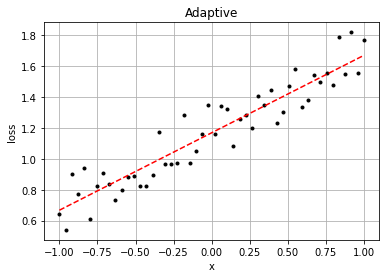

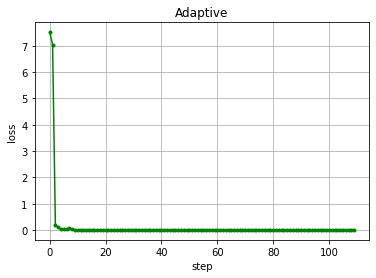

In [8]:
# Adaptive
batch_size = 5
lr = 2.0
MaxEpochs = 10

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])
search_direction = np.zeros_like(w0)

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs + 1):
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    paths.append(w0)
    batch_loss.append(loss(w0, x_batch, y_batch))

    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산
    search_direction = -grad # 탐색 방향 설정
    lr = lr # 학습률 설정
    dw = lr * search_direction # 파라미터 업데이트
    w1 = w0 + dw

    # learning rate 업데이트
    loss0 = loss(w0, x_train, y_train)
    loss1 = loss(w1, x_train, y_train)
    if loss0 > loss1:
      w0 = w1
    else:
      lr = lr/2

  print(epoch, w0, loss(w0, x_train, y_train))

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('loss')
plt.title('Adaptive')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Adaptive')
plt.show()

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[-0.29 2.34]	[1.00 -1.00]	3.0896
1-02	[2.02 2.44]	[1.38 1.58]	[-0.98 -0.56]	3.2042
1-03	[1.85 2.10]	[0.24 1.04]	[-0.17 -0.35]	0.8824
1-04	[1.57 1.72]	[0.43 1.22]	[-0.29 -0.38]	0.8649
1-05	[1.38 1.49]	[0.29 0.78]	[-0.19 -0.23]	0.3680
1-06	[1.31 1.39]	[0.10 0.31]	[-0.06 -0.09]	0.0874
1-07	[1.07 1.25]	[0.39 0.49]	[-0.25 -0.14]	0.2022
1-08	[0.93 1.27]	[0.22 -0.08]	[-0.14 0.02]	0.0718
1-09	[0.79 1.18]	[0.23 0.33]	[-0.14 -0.10]	0.0686
1-10	[0.72 1.20]	[0.11 -0.08]	[-0.07 0.02]	0.0257
2-01	[0.67 1.21]	[0.07 -0.04]	[-0.05 0.01]	0.0088
2-02	[0.60 1.20]	[0.11 0.04]	[-0.07 -0.01]	0.0194
2-03	[0.59 1.18]	[0.03 0.07]	[-0.02 -0.02]	0.0063
2-04	[0.57 1.17]	[0.02 0.04]	[-0.01 -0.01]	0.0054
2-05	[0.57 1.17]	[0.00 0.01]	[-0.00 -0.00]	0.0047
2-06	[0.57 1.18]	[0.00 -0.05]	[-0.00 0.01]	0.0065
2-07	[0.57 1.19]	[0.00 -0.02]	[-0.00 0.01]	0.0073
2-08	[0.53 1.20]	[0.05 -0.03]	[-0.03 0.01]	0.0069
2-09	[0.53 1.18]	[-0.00 0.04]	[0.00 -0.01]	0.0089
2-10	[0.

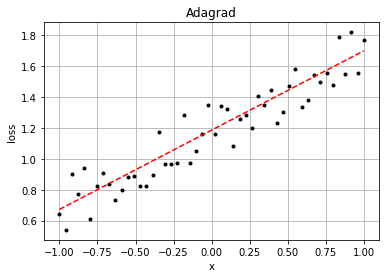

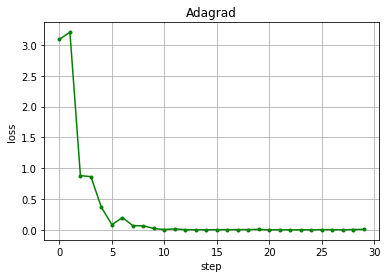

In [9]:
# Adagrad
batch_size = 5
epsilon = 1.0
MaxEpochs = 2
delta = 1e-7 #10의 -7승

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([2.0, 4.0])
r = np.zeros_like(w0)

print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
format_dict = {'float_kind' : lambda x: "%.2f" % x}
print('{:01d}-{:02d}\t{}'.format(1, 0, np.array2string(w0, formatter=format_dict)))


# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs + 1):
  k = 0
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    _loss = loss(w0, x_batch, y_batch)
    paths.append(w0)
    batch_loss.append(_loss)

    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산
    search_direction = -grad # 탐색 방향 설정
    # 학습률 설정
    r = r + grad * grad
    lr = epsilon / (delta + np.sqrt(r)) 
    dw = lr * search_direction # 파라미터 업데이트
    w0 = w0 + dw

    print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'
          .format(epoch + 1, k + 1,
                  np.array2string(w0, formatter=format_dict),
                  np.array2string(grad, formatter=format_dict),
                  np.array2string(dw, formatter=format_dict),
                  _loss))
    k += 1

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('loss')
plt.title('Adagrad')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Adagrad')
plt.show()

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[2.79 3.21]	[-0.29 2.34]	[0.79 -0.79]	3.0896
1-02	[2.02 2.71]	[1.22 1.81]	[-0.77 -0.50]	3.2858
1-03	[1.90 2.37]	[0.19 1.31]	[-0.12 -0.34]	1.1969
1-04	[1.58 2.00]	[0.49 1.50]	[-0.31 -0.37]	1.2529
1-05	[1.36 1.74]	[0.36 1.06]	[-0.23 -0.26]	0.6320
1-06	[1.29 1.60]	[0.11 0.56]	[-0.07 -0.14]	0.1961
1-07	[0.99 1.42]	[0.46 0.68]	[-0.30 -0.18]	0.3098
1-08	[0.88 1.39]	[0.15 0.11]	[-0.10 -0.03]	0.0586
1-09	[0.70 1.27]	[0.27 0.42]	[-0.19 -0.12]	0.1012
1-10	[0.68 1.25]	[0.02 0.06]	[-0.02 -0.02]	0.0188
2-01	[0.65 1.24]	[0.04 0.03]	[-0.03 -0.01]	0.0062
2-02	[0.57 1.22]	[0.09 0.08]	[-0.08 -0.03]	0.0188
2-03	[0.56 1.19]	[0.01 0.09]	[-0.01 -0.03]	0.0071
2-04	[0.54 1.17]	[0.02 0.04]	[-0.02 -0.01]	0.0051
2-05	[0.54 1.17]	[-0.00 0.00]	[0.00 -0.00]	0.0047
2-06	[0.54 1.19]	[-0.00 -0.04]	[0.00 0.02]	0.0063
2-07	[0.55 1.20]	[-0.00 -0.02]	[0.00 0.01]	0.0071
2-08	[0.50 1.20]	[0.04 -0.01]	[-0.05 0.01]	0.0057
2-09	[0.51 1.19]	[-0.01 0.04]	[0.02 -0.02]	0.0096
2-10	[0.

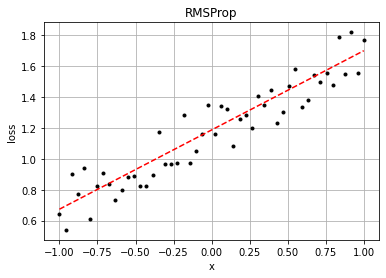

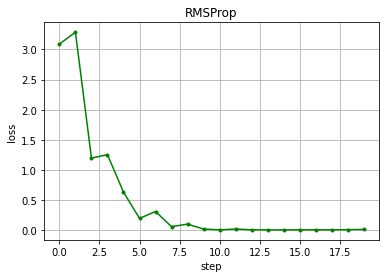

In [10]:
# RMSProp
batch_size = 5
epsilon = 0.25
MaxEpochs = 2
delta = 1e-10 #10의 -10승
rho = 0.9

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([2.0, 4.0])
r = np.zeros_like(w0)

print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
format_dict = {'float_kind' : lambda x: "%.2f" % x}
print('{:01d}-{:02d}\t{}'.format(1, 0, np.array2string(w0, formatter=format_dict)))

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs):
  k = 0
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    _loss = loss(w0, x_batch, y_batch)
    paths.append(w0)
    batch_loss.append(_loss)

    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산
    search_direction = -grad # 탐색 방향 설정
    # 학습률 설정
    r = rho  * r + (1. - rho) * grad * grad
    lr = epsilon / np.sqrt(r + delta) 
    dw = lr * search_direction # 파라미터 업데이트
    w0 = w0 + dw

    print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'
          .format(epoch + 1, k + 1,
                  np.array2string(w0, formatter=format_dict),
                  np.array2string(grad, formatter=format_dict),
                  np.array2string(dw, formatter=format_dict),
                  _loss))
    k += 1

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('loss')
plt.title('RMSProp')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('RMSProp')
plt.show()

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[-0.29 2.34]	[1.00 -1.00]	3.0896
1-02	[2.41 2.03]	[1.38 1.58]	[-0.59 -0.97]	3.2042
1-03	[1.78 1.17]	[0.44 0.55]	[-0.63 -0.86]	0.6864
1-04	[1.19 0.41]	[0.22 0.28]	[-0.59 -0.76]	0.1482
1-05	[0.71 -0.10]	[-0.07 -0.61]	[-0.48 -0.51]	0.2147
1-06	[0.31 -0.29]	[-0.04 -1.31]	[-0.40 -0.19]	0.8616
1-07	[0.21 -0.22]	[-0.68 -1.59]	[-0.10 0.08]	1.2834
1-08	[0.04 0.02]	[0.25 -1.35]	[-0.17 0.24]	0.9195
1-09	[0.13 0.38]	[-0.85 -1.39]	[0.09 0.36]	1.0063
1-10	[0.14 0.77]	[0.26 -0.53]	[0.01 0.38]	0.1475
2-01	[0.17 1.14]	[-0.04 -0.28]	[0.02 0.38]	0.0674
2-02	[0.24 1.48]	[-0.20 0.03]	[0.07 0.33]	0.0381
2-03	[0.34 1.73]	[-0.14 0.42]	[0.10 0.25]	0.0947
2-04	[0.40 1.89]	[0.09 0.54]	[0.07 0.16]	0.1497
2-05	[0.43 1.96]	[0.14 0.69]	[0.02 0.07]	0.2460
2-06	[0.44 1.93]	[0.02 0.74]	[0.02 -0.03]	0.2788
2-07	[0.39 1.83]	[0.25 0.68]	[-0.05 -0.10]	0.2405
2-08	[0.39 1.67]	[-0.16 0.66]	[-0.00 -0.16]	0.2188
2-09	[0.34 1.47]	[0.17 0.44]	[-0.05 -0.20]	0.1111
2-10	[0

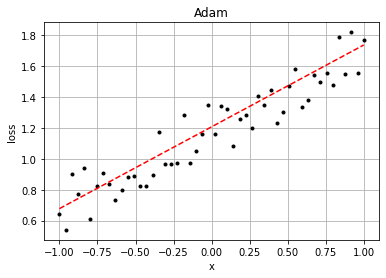

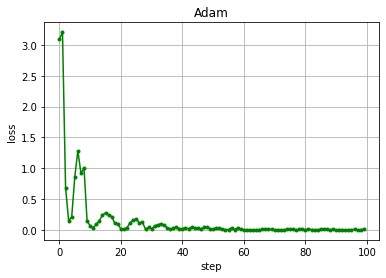

In [11]:
# Adam
batch_size = 5
epsilon = 1.0
MaxEpochs = 10
delta = 1e-8 #10의 -8승
rho1 = 0.9
rho2 = 0.999

# 초기값 설정
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0 #y = 0.5x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

paths = []
batch_loss = []
w0 = np.array([2.0, 4.0])
s = np.zeros_like(w0)
r = np.zeros_like(w0)
t = 0

print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
format_dict = {'float_kind' : lambda x: "%.2f" % x}
print('{:01d}-{:02d}\t{}'.format(1, 0, np.array2string(w0, formatter=format_dict)))

# 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 미니배치 생성
for epoch in range(MaxEpochs):
  k = 0
  for x_batch, y_batch in generate_batches(5, shuffled_x_train, shuffled_y_train):
    _loss = loss(w0, x_batch, y_batch)
    paths.append(w0)
    batch_loss.append(_loss)

    grad = loss_grad(w0, x_batch, y_batch) # 기울기 계산

    s = rho1 * s + (1. - rho1) * grad
    r = rho2 * r + (1. - rho2) * (grad * grad)
    t += 1
    s_hat = s / (1. - rho1 ** t)
    r_hat = r / (1. - rho2 ** t)

    search_direction = -s_hat # 탐색 방향 설정
    # 학습률 설정
    lr = epsilon / (delta + np.sqrt(r_hat)) 
    dw = lr * search_direction # 파라미터 업데이트
    w0 = w0 + dw

    print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'
          .format(epoch + 1, k + 1,
                  np.array2string(w0, formatter=format_dict),
                  np.array2string(grad, formatter=format_dict),
                  np.array2string(dw, formatter=format_dict),
                  _loss))
    k += 1

w = paths[-1][0]
b = paths[-1][1]

plt.plot(x_train, y_train, '.k') # 실제 데이터 분포
plt.plot(x_train, w * x_train + b, 'r--') # 검출된 w, b를 활용한 데이터 추정하는 함수
plt.xlabel('x')
plt.ylabel('loss')
plt.title('Adam')
plt.grid()
plt.show()

plt.plot(batch_loss, '.-g')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('Adam')
plt.show()